In [128]:
import numpy as np
import matplotlib.pyplot as plt

In [129]:
X = np.random.randn(10)
Y = 3 * X + 2 + np.random.randn(10) * 1.2

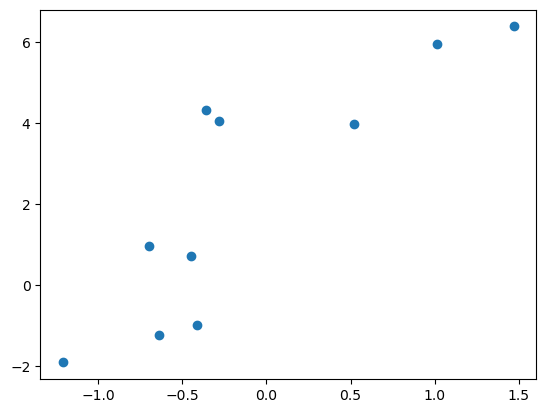

In [130]:
plt.plot(X, Y, "o")

In [131]:
def regression(X, Y, n):
    rows = [X**i for i in reversed(range(n))]
    A = np.vstack(rows).T
    theta = np.linalg.solve(A.T@A, A.T@Y)
    return theta

In [132]:
def predict(X, theta):
    n = len(theta)
    degrees = reversed(range(n))

    Y = np.zeros_like(X)
    for w, d in zip(theta, degrees):
        Y += w * X**d
    return Y

In [133]:
theta = regression(X, Y, 3)

In [134]:
predict(X, theta)

array([-2.25549277,  1.4000695 ,  2.09174939,  0.57139269,  6.38628412,
        4.68246376,  1.77927627,  1.5465745 ,  5.75351501,  0.31718369])

Text(0, 0.5, 'Y')

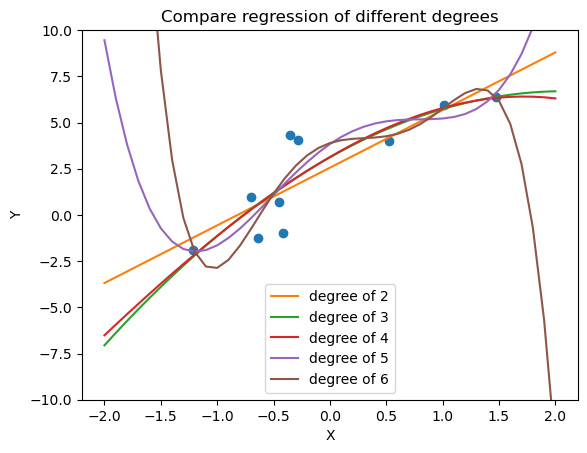

In [135]:
X_model = np.linspace(-2, 2, 41)

plt.plot(X, Y, "o")

for n in range(2, 7):
    theta = regression(X, Y, n)
    Yhat = predict(X, theta)
    Y_model = predict(X_model, theta)

    plt.plot(X_model, Y_model, label="degree of {}".format(n))
plt.ylim(-10, 10)
plt.title("Compare regression of different degrees")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")

In [136]:
Ss = []
Ns = []

for n in range(2, 11):
    theta = regression(X, Y, n)
    Yhat = predict(X, theta)
    E = Y - Yhat
    S = np.dot(E, E) / len(Y)
    
    Ss.append(S)
    Ns.append(n)

Text(0, 0.5, 'average square error')

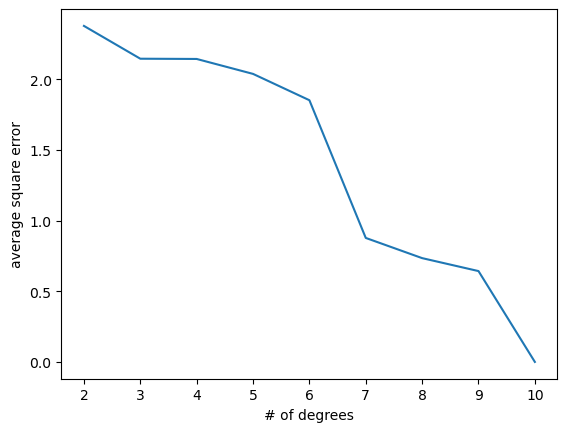

In [137]:
plt.plot(Ns, Ss)
plt.xlabel("# of degrees")
plt.ylabel("average square error")

In [138]:
X_test = np.random.randn(10)
Y_test = 3 * X + 2 + np.random.randn(10) * 1.2

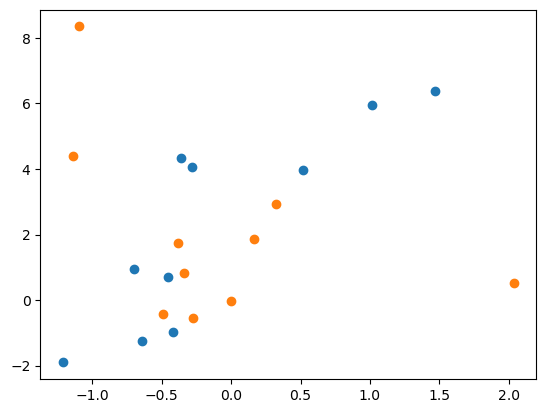

In [139]:
plt.plot(X, Y, "o")
plt.plot(X_test, Y_test, "o")

In [140]:
Ss_test = []
Ns_test = []

for n in range(2, 11):
    theta = regression(X, Y, n)
    Yhat_test = predict(X_test, theta)
    E = Y_test - Yhat_test
    S = np.dot(E, E) / len(Y)
    
    Ss_test.append(S)
    Ns_test.append(n)

(0.0, 40.0)

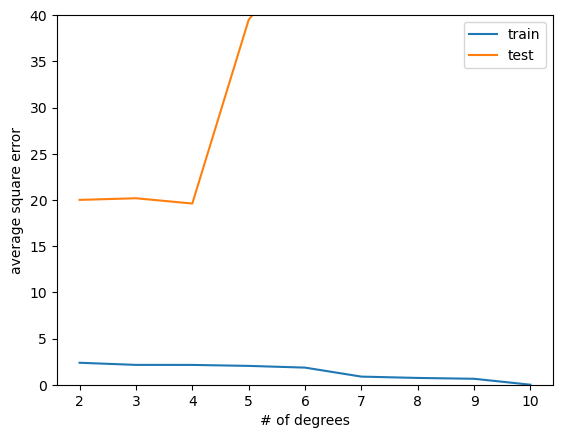

In [141]:
plt.plot(Ns, Ss, label="train")
plt.plot(Ns_test, Ss_test, label="test")
plt.xlabel("# of degrees")
plt.ylabel("average square error")
plt.legend()
plt.ylim(0, 40)

In [142]:
def ridge_regression(X, Y, n, lda):
    rows = [X**i for i in reversed(range(n))]
    A = np.vstack(rows).T
    I = np.identity(n)
    theta = np.linalg.solve(A.T@A+lda*I, A.T@Y)
    return theta

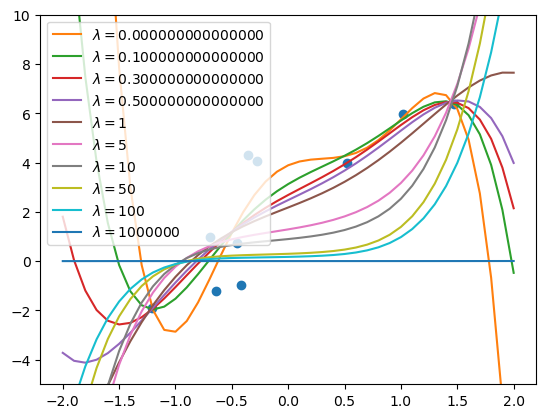

In [150]:
plt.plot(X, Y, "o")

for lda in [0.0, 0.1, 0.3, 0.5, 1, 5, 10, 50, 100, 1000000]:
    theta = ridge_regression(X, Y, 6, lda)

    plt.plot(X_model, predict(X_model, theta), label=r"$\lambda={}$".format(lda))
    plt.ylim(-5, 10)

plt.legend()

In [152]:
def weighted_regression(X, Y, C, n):
    rows = [X**i for i in reversed(range(n))]
    A = np.vstack(rows).T
    C = np.diag(C)

    theta = np.linalg.solve(A.T@C@A, A.T@C@Y)
    return theta

In [157]:
X_good = np.random.randn(5)
Y_good = 3 * X_good + 2 + np.random.randn(5)
X_bad = np.random.randn(10)
Y_bad = 3 * X_bad + 2 + np.random.randn(10) * 5

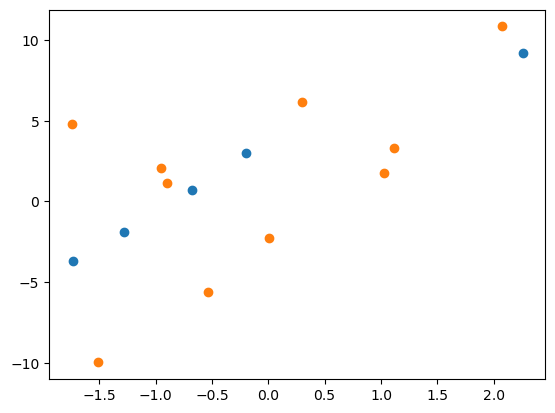

In [158]:
plt.plot(X_good, Y_good, "o")
plt.plot(X_bad, Y_bad, "o")

In [159]:
X = np.hstack([X_good, X_bad])
Y = np.hstack([Y_good, Y_bad])
C = [1]*5 + [1/25]*10

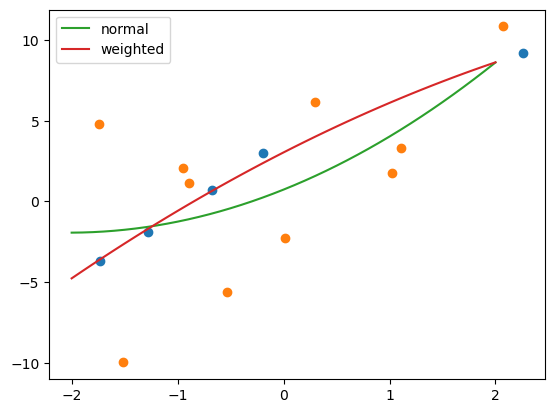

In [161]:
theta1 = regression(X, Y, 3)
theta2 = weighted_regression(X, Y, C, 3)

plt.plot(X_good, Y_good, "o")
plt.plot(X_bad, Y_bad, "o")
plt.plot(X_model, predict(X_model, theta1), label="normal")
plt.plot(X_model, predict(X_model, theta2), label="weighted")
plt.legend()